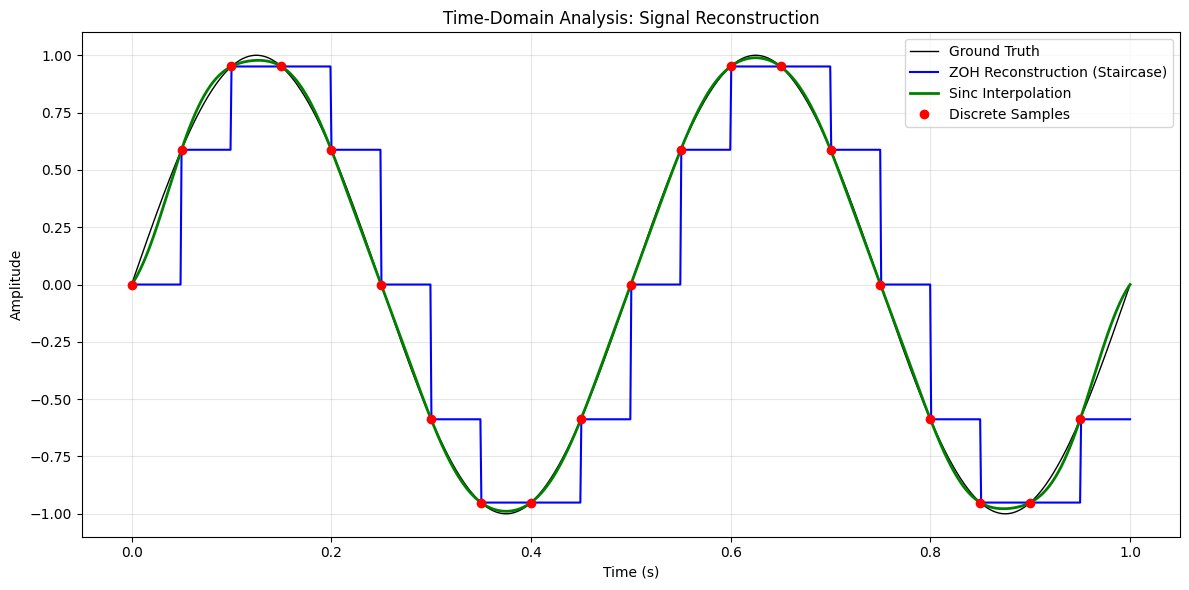

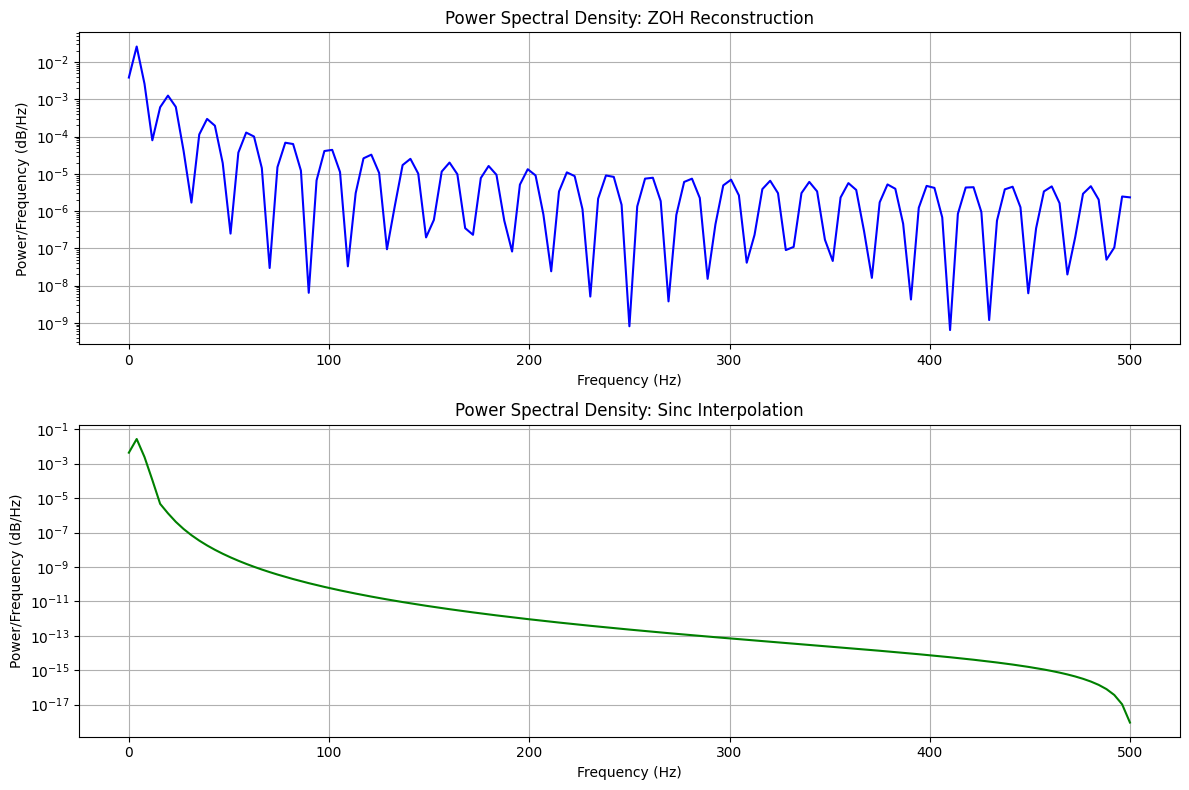

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import signal

# ==========================================
# 1. SETUP & GROUND TRUTH GENERATION
# ==========================================

# Parameters
f_signal = 2.0        # Frequency of the sine wave (Hz)
fs = 20.0             # Sampling frequency (Hz) - Over-sampled to satisfy Nyquist
duration = 1.0        # Duration of the signal (seconds)

# A. Create "Ground Truth" (High resolution time vector to simulate continuous time)
t_continuous = np.linspace(0, duration, 1000)
ground_truth = np.sin(2 * np.pi * f_signal * t_continuous)

# ==========================================
# 2. SAMPLING
# ==========================================

# B. Create Discrete Samples
ts = 1 / fs                           # Sampling interval
t_samples = np.arange(0, duration, ts) # Discrete time points
discrete_samples = np.sin(2 * np.pi * f_signal * t_samples)

# ==========================================
# 3. RECONSTRUCTION
# ==========================================

# C. Reconstruction 1: Zero-Order Hold (ZOH)
# We repeat each sample value until the next sample arrives
# We use 'step' plotting later, but for calculation we can interpolate 'zero'
from scipy.interpolate import interp1d
zoh_interpolator = interp1d(t_samples, discrete_samples, kind='zero', fill_value="extrapolate")
zoh_reconstruction = zoh_interpolator(t_continuous)

# D. Reconstruction 2: Sinc Interpolation (Ideal Reconstruction)
# Formula: x(t) = sum( x[n] * sinc( (t - nTs) / Ts ) )
sinc_reconstruction = np.zeros_like(t_continuous)

for i, t_point in enumerate(t_continuous):
    # Summation over all samples
    sum_val = 0
    for j, sample_val in enumerate(discrete_samples):
        # Normalized time difference
        sample_time = t_samples[j]
        sum_val += sample_val * np.sinc((t_point - sample_time) * fs) # numpy.sinc includes pi implicitly
    sinc_reconstruction[i] = sum_val

# ==========================================
# 4. PLOTTING: Time-Domain Analysis
# ==========================================

plt.figure(figsize=(12, 6))
plt.title('Time-Domain Analysis: Signal Reconstruction')

# 1. Ground Truth (Thin black line)
plt.plot(t_continuous, ground_truth, 'k-', linewidth=1, label='Ground Truth')

# 3. ZOH Reconstruction (Blue staircase line)
# Using 'drawstyle=steps-post' to visually represent the hold correctly
plt.plot(t_continuous, zoh_reconstruction, 'b-', label='ZOH Reconstruction (Staircase)')

# 4. Sinc Reconstruction (Green line)
plt.plot(t_continuous, sinc_reconstruction, 'g-', linewidth=2, label='Sinc Interpolation')

# 2. Discrete Samples (Red 'o' markers)
# Plotted last to appear on top
plt.plot(t_samples, discrete_samples, 'ro', label='Discrete Samples')

plt.xlabel('Time (s)')
plt.ylabel('Amplitude')
plt.legend(loc='upper right')
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

# ==========================================
# 5. PLOTTING: Frequency-Domain Analysis (PSD)
# ==========================================

plt.figure(figsize=(12, 8))

# Subplot 1: PSD of ZOH Signal
plt.subplot(2, 1, 1)
f_zoh, Pxx_zoh = signal.welch(zoh_reconstruction, fs=1000) # fs is 1000 because t_continuous has 1000 pts/sec
plt.semilogy(f_zoh, Pxx_zoh, 'b')
plt.title('Power Spectral Density: ZOH Reconstruction')
plt.xlabel('Frequency (Hz)')
plt.ylabel('Power/Frequency (dB/Hz)')
plt.grid(True)

# Subplot 2: PSD of Sinc Signal
plt.subplot(2, 1, 2)
f_sinc, Pxx_sinc = signal.welch(sinc_reconstruction, fs=1000)
plt.semilogy(f_sinc, Pxx_sinc, 'g')
plt.title('Power Spectral Density: Sinc Interpolation')
plt.xlabel('Frequency (Hz)')
plt.ylabel('Power/Frequency (dB/Hz)')
plt.grid(True)

plt.tight_layout()
plt.show()